In [2]:
import re
import calendar
import map_setup
import numpy as np
import pandas as pd
import cartopy.feature as cfeature  
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [9]:
amt_hplc_sql = {"Cruise": "cruise",
            "Latitude[deg+veN]": "latitude",
            "Longitude[deg+veE]": "longitude",
            "yyyy-mm-ddThh24:mi:ss[GMT]": "date_time",
            "Bot_depth[metres]": "depth",
            "ABCRHPP1[ng/l]": "hplc_alpha_beta_car",
            "ALLOHPP1[ng/l]": "hplc_allo",
            "BUTAHPP1[ng/l]": "hplc_but_fuco",
            "C1C2HPP1[ng/l]": "hplc_chl_c12",
            "C2MEHPC1[ng/l]": "hplc_chl_c2_mgdg_14",
            "C2MEHPE1[ng/l]": "hplc_chl_c2_mgdg_18",
            "CHLBHPP1[ng/l]": "hplc_tot_chl_b",
            "CHLCHPP1[ng/l]": "hplc_tot_chl_c",
            "CPHLFLP1[mg/m^3]": "chl_a_fluor", 
            "CPHLHPP1[ng/l]": "hplc_tot_chl_a",
            "CLC3HPP1[ng/l]": "hplc_chl_c3",
            "DIADHPP1[ng/l]": "hplc_diadino",
            "DIATHPP1[ng/l]": "hplc_diato",
            "DVCAHPP1[ng/l]": "hplc_dv_chl_a",
            "DVCBHPP1[ng/l]": "hplc_dv_chl_b",
            "FUCXHPP1[ng/l]": "hplc_fuco",
            "GDHPLC01[ng/l]": "hplc_gyro",
            "HEXOHPP1[ng/l]": "hplc_hex_fuco",
            "LUTNHPP1[ng/l]": "hplc_lut",
            "MVC3HPP1[ng/l]": "hplc_mv_chl_c3",
            "MVACHPP1[ng/l]": "hplc_mv_chl_a",
            "NEOXHPP1[ng/l]": "hplc_neo",
            "PBAXHPP1[ng/l]": "hplc_phide_a",
            "PBBXHPP1[ng/l]": "hplc_phide_b",
            "PTAXHPP1[ng/l]": "hplc_phytin_a",
            "PTBXHPP1[ng/l]": "hplc_phytin_b",
            "PYPTHPP1[ng/l]": "hplc_pyrophaeo_a",
            "PERIHPP1[ng/l]": "hplc_perid",
            "PRSXHPP1[ng/l]": "hplc_pras",
            "VILXHPP1[ng/l]": "hplc_viola",
            "ZEOXHPP1[ng/l]": "hplc_zea"}

In [10]:
amt_hplc_r = pd.read_csv("../../data/datasets/unmodified/amt/amt_hplc.csv")
amt_hplc_r

,Cruise,BODC_stn,Orig_stn,ODV_type,Gear,Latitude[deg+veN],Longitude[deg+veE],W_depth[metres],yyyy-mm-ddThh24:mi:ss[GMT],Site,...,VINESDP1[ng/l],QV:BODC.113,ZELUHPP1[ng/l],QV:BODC.114,ZELUSDP1[ng/l],QV:BODC.115,ZEOXHPP1[ng/l],QV:BODC.116,ZEOXSDP1[ng/l],QV:BODC.117
0,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,,27/09/1995 11:00,-,...,NaN,N,NaN,N,NaN,N,47.08,,NaN,N
1,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,,27/09/1995 11:00,-,...,NaN,N,NaN,N,NaN,N,39.70,,NaN,N
2,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,,27/09/1995 11:00,-,...,NaN,N,NaN,N,NaN,N,54.36,,NaN,N
3,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,,27/09/1995 11:00,-,...,NaN,N,NaN,N,NaN,N,38.93,,NaN,N
4,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,,27/09/1995 11:00,-,...,NaN,N,NaN,N,NaN,N,30.27,,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6559,JR16001,1978140,UWAY_HPLC_81,b,GPUMP,-53.0224,-44.9937,2187.2,01/11/2016 04:47,-,...,NaN,N,NaN,N,NaN,N,7.39,,NaN,N
6560,JR16001,1978147,UWAY_HPLC_82,b,GPUMP,-52.8357,-46.7724,2787.6,01/11/2016 13:28,-,...,NaN,N,NaN,N,NaN,N,2.91,,NaN,N
6561,JR16001,1978553,ESA_HPLC_38,b,GPUMP,-52.8256,-46.8681,2798.9,01/11/2016 13:50,-,...,NaN,N,NaN,N,NaN,N,1.67,,NaN,N
6562,JR16001,1978154,UWAY_HPLC_83,b,GPUMP,-52.2476,-52.2411,2508.6,02/11/2016 10:36,-,...,NaN,N,NaN,N,NaN,N,10.16,,NaN,N


In [11]:
# Remove pigment columns that are all nan (need some species composition to be present)
amt_hplc = amt_hplc_r.replace("N", pd.NaT).replace(" ", pd.NaT)
amt_hplc = amt_hplc.dropna(axis=1, how="all")

# Get all columns that have ng/L in the name and convert them to ug/L
a_ng = amt_hplc.filter(regex="ng/l", axis=1)
a_ug = a_ng.div(1000)
amt_hplc[a_ug.columns] = a_ug
amt_hplc = amt_hplc.rename(columns=amt_hplc_sql)
amt_hplc


,cruise,BODC_stn,Orig_stn,ODV_type,Gear,latitude,longitude,W_depth[metres],date_time,Site,...,QV:BODC.110,VILXSDP1[ng/l],VINEHPP1[ng/l],QV:BODC.112,VINESDP1[ng/l],ZELUHPP1[ng/l],ZELUSDP1[ng/l],hplc_zea,QV:BODC.116,ZEOXSDP1[ng/l]
0,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,NaT,27/09/1995 11:00,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04708,NaN,NaN
1,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,NaT,27/09/1995 11:00,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03970,NaN,NaN
2,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,NaT,27/09/1995 11:00,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05436,NaN,NaN
3,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,NaT,27/09/1995 11:00,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03893,NaN,NaN
4,AMT1,1502343,CTD03,b,CTD,47.0132,-19.9849,NaT,27/09/1995 11:00,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03027,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6559,JR16001,1978140,UWAY_HPLC_81,b,GPUMP,-53.0224,-44.9937,2187.2,01/11/2016 04:47,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00739,NaN,NaN
6560,JR16001,1978147,UWAY_HPLC_82,b,GPUMP,-52.8357,-46.7724,2787.6,01/11/2016 13:28,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00291,NaN,NaN
6561,JR16001,1978553,ESA_HPLC_38,b,GPUMP,-52.8256,-46.8681,2798.9,01/11/2016 13:50,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00167,NaN,NaN
6562,JR16001,1978154,UWAY_HPLC_83,b,GPUMP,-52.2476,-52.2411,2508.6,02/11/2016 10:36,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01016,NaN,NaN


In [12]:
amt_other_sql = {"Cruise": "cruise",
            "Latitude[deg+veN]": "latitude",
            "Longitude[deg+veE]": "longitude",
            "yyyy-mm-ddThh24:mi:ss[GMT]": "date_time",
            "Bot_depth[metres]": "depth",
            "TEMPCU01[degC]": "temperature",
            "MDMAP014[umol/kg]": "tot_alkalinity",
            "CORGCAP1[umol/l]": "poc",
            "NTRIAATX[umol/l]": "nitrite",
            "NTRZAATX[umol/l]": "nitrate_nitrite",
            "PHOSAATX[umol/l]": "phosphate",
            "SLCAAATX[umol/l]": "silicate"}

In [13]:
amt_other_r = pd.read_csv("../../data/datasets/unmodified/amt/amt_other.csv")
amt_other_r

,Cruise,BODC_stn,Orig_stn,ODV_type,Gear,Latitude[deg+veN],Longitude[deg+veE],W_depth[metres],yyyy-mm-ddThh24:mi:ss[GMT],Site,...,TEMPSD03[degC],QV:BODC.87,TEMPSD04[degC],QV:BODC.88,TEMPST01[degC],QV:BODC.89,TEMPST02[degC],QV:BODC.90,UWIRPP01[W/m^2],QV:BODC.91
0,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,NaN,N,NaN,N,16.654,,NaN,N,NaN,N
1,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,NaN,N,NaN,N,16.625,,NaN,N,NaN,N
2,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,NaN,N,NaN,N,16.589,,NaN,N,NaN,N
3,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,NaN,N,NaN,N,16.576,,NaN,N,NaN,N
4,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,NaN,N,NaN,N,12.152,,NaN,N,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27302,JR20131005,1692708,CTD065,b,CTD,-46.2713,-50.7457,6021,06/11/2013 14:13,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
27303,JR20131005,1692708,CTD065,b,CTD,-46.2713,-50.7457,6021,06/11/2013 14:13,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
27304,JR20131005,1693401,sal084,b,GPUMP,-48.0774,-52.9063,3643.2,07/11/2013 06:42,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
27305,JR20131005,1693408,sal085,b,GPUMP,-48.6836,-53.6938,5060.5,07/11/2013 11:44,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N


In [14]:
# if NTTRIAATX is given, use it, otherwise use NTRZAATX
amt_other = amt_other_r
amt_other["nitrate"] = amt_other["NTRIAATX[umol/l]"].fillna(amt_other["NTRZAATX[umol/l]"])
# if PSALST01[Dmnless] is given use it, otherwise use PSALCC01[Dmnless], otherwise use PSALBSTX[Dmnless]
amt_other["salinity"] = amt_other["PSALST01[Dmnless]"].fillna(amt_other["PSALCC01[Dmnless]"]).fillna(amt_other["PSALBSTX[Dmnless]"])
# if DOXYSC01[umol/l] is given use it, otherwise use DOXYSU01[umol/l], otherwise use DOXYWITX[umol/l]
amt_other["oxygen"] = amt_other["DOXYSC01[umol/l]"].fillna(amt_other["DOXYSU01[umol/l]"]).fillna(amt_other["DOXYWITX[umol/l]"])
amt_other = amt_other.rename(columns=amt_other_sql)
amt_other = amt_other.groupby(["cruise", "latitude", "longitude", "date_time", "depth"]).head(1)
amt_other

,cruise,BODC_stn,Orig_stn,ODV_type,Gear,latitude,longitude,W_depth[metres],date_time,Site,...,QV:BODC.88,TEMPST01[degC],QV:BODC.89,TEMPST02[degC],QV:BODC.90,UWIRPP01[W/m^2],QV:BODC.91,nitrate,salinity,oxygen
0,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,N,16.654,,NaN,N,NaN,N,0.02,35.512,NaN
1,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,N,16.625,,NaN,N,NaN,N,0.02,35.512,NaN
2,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,N,16.589,,NaN,N,NaN,N,0.03,35.512,NaN
3,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,N,16.576,,NaN,N,NaN,N,0.18,35.512,NaN
4,AMT1,1502341,CTD01,b,CTD,48.9312,-9.1461,,25/09/1995 12:46,-,...,N,12.152,,NaN,N,NaN,N,0.04,35.533,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27302,JR20131005,1692708,CTD065,b,CTD,-46.2713,-50.7457,6021,06/11/2013 14:13,-,...,N,NaN,N,NaN,N,NaN,N,0.12,NaN,NaN
27303,JR20131005,1692708,CTD065,b,CTD,-46.2713,-50.7457,6021,06/11/2013 14:13,-,...,N,NaN,N,NaN,N,NaN,N,0.13,NaN,NaN
27304,JR20131005,1693401,sal084,b,GPUMP,-48.0774,-52.9063,3643.2,07/11/2013 06:42,-,...,N,NaN,N,NaN,N,NaN,N,NaN,34.691,NaN
27305,JR20131005,1693408,sal085,b,GPUMP,-48.6836,-53.6938,5060.5,07/11/2013 11:44,-,...,N,NaN,N,NaN,N,NaN,N,NaN,34.038,NaN


In [15]:
# join hplc and other
amt_sample = amt_hplc.merge(amt_other, how="left", on=["cruise", "latitude", "longitude", "date_time", "depth"])
amt_sample = amt_sample.loc[:,~amt_sample.columns.str.endswith("_x")]
# convert date_time to datetime format
amt_sample["date_time"] = pd.to_datetime(amt_sample["date_time"], format="%d/%m/%Y %H:%M")
amt_sample["id"] = amt_sample.index + 1

amt_sample["source_name"] = "AMT"
amt_sample["hplc_present"] = 1
amt_sample["chemtax_present"] = 0
amt_sample["microscopy_present"] = 1
amt_sample

,cruise,latitude,longitude,date_time,depth,hplc_alpha_beta_car,ABCRSDP1[ng/l],hplc_allo,ALLOSDP1[ng/l],ANTHHPP1[ng/l],...,UWIRPP01[W/m^2],QV:BODC.91,nitrate,salinity,oxygen,id,source_name,hplc_present,chemtax_present,microscopy_present
0,AMT1,47.0132,-19.9849,1995-09-27 11:00:00,8.4,NaN,NaN,0.00000,NaN,NaN,...,NaN,N,0.02,35.600,NaN,1,AMT,1,0,1
1,AMT1,47.0132,-19.9849,1995-09-27 11:00:00,20.5,NaN,NaN,0.00000,NaN,NaN,...,NaN,N,0.02,35.597,NaN,2,AMT,1,0,1
2,AMT1,47.0132,-19.9849,1995-09-27 11:00:00,30.5,NaN,NaN,0.00000,NaN,NaN,...,NaN,N,0.02,35.590,NaN,3,AMT,1,0,1
3,AMT1,47.0132,-19.9849,1995-09-27 11:00:00,41.3,NaN,NaN,0.00982,NaN,NaN,...,NaN,N,0.23,35.538,NaN,4,AMT,1,0,1
4,AMT1,47.0132,-19.9849,1995-09-27 11:00:00,50.9,NaN,NaN,0.00409,NaN,NaN,...,NaN,N,0.45,35.606,NaN,5,AMT,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6559,JR16001,-53.0224,-44.9937,2016-11-01 04:47:00,5.5,NaN,NaN,0.00131,NaN,0.00030,...,NaN,NaN,NaN,NaN,NaN,6560,AMT,1,0,1
6560,JR16001,-52.8357,-46.7724,2016-11-01 13:28:00,5.5,NaN,NaN,0.00455,NaN,0.00681,...,NaN,NaN,NaN,NaN,NaN,6561,AMT,1,0,1
6561,JR16001,-52.8256,-46.8681,2016-11-01 13:50:00,5.5,NaN,NaN,0.00030,NaN,0.00030,...,NaN,NaN,NaN,NaN,NaN,6562,AMT,1,0,1
6562,JR16001,-52.2476,-52.2411,2016-11-02 10:36:00,5.5,NaN,NaN,0.01346,NaN,0.00680,...,NaN,NaN,NaN,NaN,NaN,6563,AMT,1,0,1


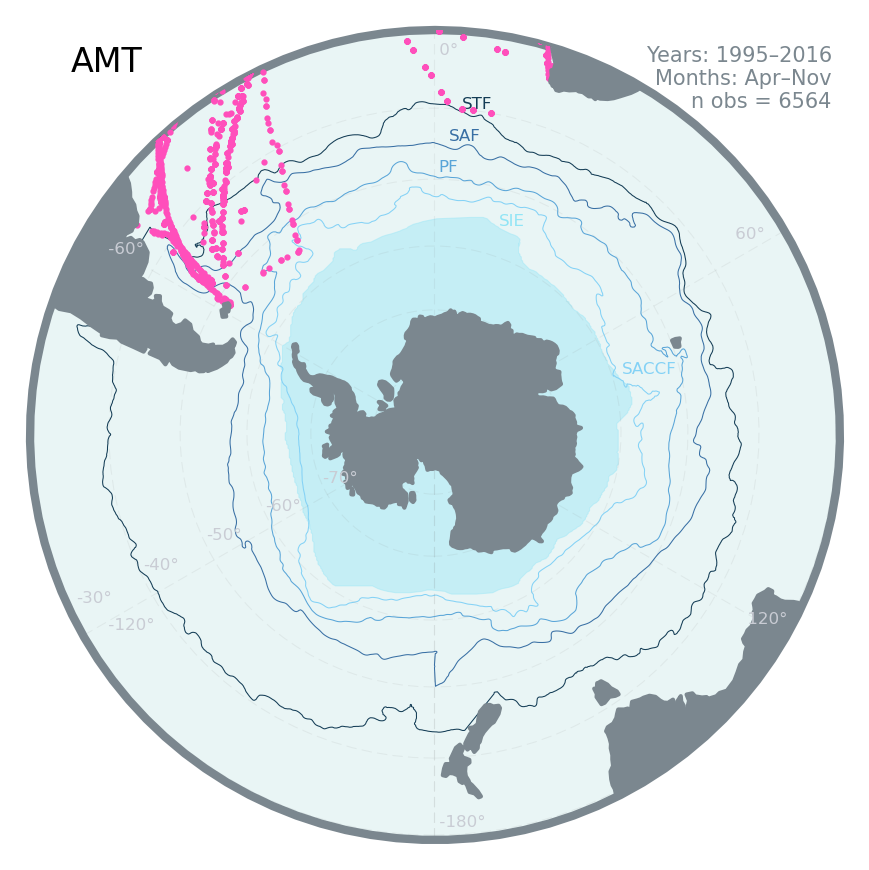

In [16]:
############ DATA TO PLOT ################################################
dataset        = amt_sample
data_longitude = dataset.longitude
data_latitude  = dataset.latitude
############ SET UP PLOT ################################################
#### COLORS
data_point_color = '#FF4FBB'
#### FIGURE SIZE
fig_width  = 3   # inches
fig_height = 3   # inches
markersize = 1
#### CREATE FIGURE
fig  = plt.figure(figsize=[fig_width, fig_height], dpi=300) # inches
ax1  = plt.subplot(projection = map_setup.map_proj)
############ CREATE MAP ################################################
# Make map
map_setup.map_southern_ocean_axes_setup(ax1, fig, add_gridlines=True)
# Add fronts to map
map_setup.add_fronts(ax1, add_labels=True, front_linewidth=0.25, fontsize=4)
# Add land after front
ax1.add_feature(cfeature.LAND, zorder=7, linewidth = 1, edgecolor=map_setup.overplot_label_color, facecolor=map_setup.overplot_label_color)
############ ADD DATA TO MAP ################################################
plt.scatter(x=data_longitude, y=data_latitude, c=data_point_color, transform=map_setup.text_proj, zorder=6, s=markersize, linewidths=0.5)
############ FORMAT TITLE ###################################################
# Get source name and number of observations
source_name_title = np.unique(dataset.source_name)[0]
n_obs = len(dataset)
# Find range of years
first_year = dataset["date_time"].dt.year.min().astype(int).astype(str)
last_year  = dataset["date_time"].dt.year.max().astype(int).astype(str)

if first_year != last_year:
    years = first_year + u'\u2013' + last_year
else:
    years = first_year
        
first_month = dataset.date_time.dt.month.min().astype(int)
last_month  = dataset.date_time.dt.month.max().astype(int)

months = calendar.month_abbr[first_month] + u'\u2013' + calendar.month_abbr[last_month]

plt.title(source_name_title, loc='left', x=0.05, y=.95, va='top', fontsize=8)
plt.title('Years: ' + years + '\nMonths: ' + months + '\nn obs = ' + str(n_obs), fontsize=5, loc='right', x=0.99, y=0.95, color=map_setup.overplot_label_color, va='top')
plt.show()

In [272]:
amt_sample.to_csv("../../data/datasets/modified/amt/amt_sample.csv", index=False)

In [4]:
amt_micro_r = pd.read_csv("../../data/datasets/unmodified/amt/amt_microphyto.csv")
amt_micro_r

,Cruise,BODC_stn,Orig_stn,ODV_type,Gear,Latitude[deg+veN],Longitude[deg+veE],W_depth[metres],yyyy-mm-ddThh24:mi:ss[GMT],Site,...,W3291431[#/ml],QV:BODC.237,WA006877[#/ml],QV:BODC.238,X2827BB0[#/ml],QV:BODC.239,XA130594[#/ml],QV:BODC.240,XAA60639[mg/m^3],QV:BODC.241
0,AMT1,1502344,CTD04,b,CTD,42.2547,-20.0313,,28/09/1995 13:39,-,...,0.0,C,0.0,,0.0,,0.0,,NaN,N
1,AMT1,1502344,CTD04,b,CTD,42.2547,-20.0313,,28/09/1995 13:39,-,...,0.0,C,0.0,,0.0,,0.0,,NaN,N
2,AMT1,1502345,CTD05,b,CTD,37.9106,-19.9905,,29/09/1995 13:24,-,...,0.0,C,0.0,,0.0,,0.0,,NaN,N
3,AMT1,1502345,CTD05,b,CTD,37.9106,-19.9905,,29/09/1995 13:24,-,...,0.0,C,0.0,,0.0,,0.0,,NaN,N
4,AMT1,1502346,CTD06,b,CTD,33.5971,-20.8778,,30/09/1995 13:25,-,...,0.0,C,1.0,,0.0,,0.0,,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,JR16001,1869836,CTD072,b,CTD,-53.5903,-39.9757,1970.1,31/10/2016 05:30,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
924,JR16001,1868191,GU,b,GPUMP,-53.4710,-40.9293,2126.5,31/10/2016 11:00,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
925,JR16001,1869899,CTD074,b,CTD,-53.0122,-45.0883,2355.8,01/11/2016 05:24,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
926,JR16001,1869899,CTD074,b,CTD,-53.0122,-45.0883,2355.8,01/11/2016 05:24,-,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N


Parse microphyto HTML to get mapping from AMT ID's to taxa names

In [5]:
with open("../../data/datasets/unmodified/amt/BODC_sample_metadata_report_microphyto.html") as f:
    html_content = f.read()
soup = BeautifulSoup(html_content, 'html.parser')
# Find all <tr> elements in the HTML
rows = soup.find_all('tr')
# Define a regular expression pattern to extract the id and taxa name. take everything after "Abundance of " and before " per unit volume" or " ("
pattern = re.compile(r"Abundance of (.+?)( per unit volume|\s\()")
html_amt_micro_id_taxa = {}
# Iterate through each <tr> element and extract the required information
for row in rows:
    cells = row.find_all('td')
    if len(cells) >= 5:
        id_value = cells[0].get_text().strip()
        description = cells[4].get_text().strip()
        match = pattern.search(description)
        if match:
            taxa_name = match.group(1)
            # make a dictionary of the id and taxa name
            html_amt_micro_id_taxa[f"{id_value}[#/ml]"] = taxa_name
# for key, value in html_amt_micro_id_taxa.items():
#     print(f"'{key}': '{value}',")
print(html_amt_micro_id_taxa)
print(len(html_amt_micro_id_taxa))

{'A8308246[#/ml]': 'Fragilariopsis kerguelensis', 'B557AA66[#/ml]': 'Calyptrosphaera', 'B66018BB[#/ml]': 'Rhizosolenia simplex', 'C029888B[#/ml]': 'Thalassiosira', 'C0A80663[#/ml]': 'Helicosphaera carteri hyalina', 'C5558380[#/ml]': 'Gymnodinium-like', 'C8B43B67[#/ml]': 'Gyrodinium', 'CBCCM00Z[#/ml]': 'Cyanobacteria', 'E3008126[#/ml]': 'Gymnodinium', 'E3494120[#/ml]': 'Fragilariopsis cylindrus', 'E6729813[#/ml]': 'Syracosphaera', 'F6114A16[#/ml]': 'Gymnodinium', 'G4235075[#/ml]': 'Calyptrosphaera', 'G516222B[#/ml]': 'Trichodesmium', 'G8B59073[#/ml]': 'Thalassiosira', 'I29950A6[#/ml]': 'Nitzschia', 'I3A97A37[#/ml]': 'Chaetoceros atlanticum skeleton', 'J1214333[#/ml]': 'Chaetoceros vixvisibilis', 'J2068836[#/ml]': 'Dinophyceae', 'J61170A1[#/ml]': 'Prorocentrum', 'K0403920[#/ml]': 'Prymnesiophyceae', 'K93784B0[#/ml]': 'Lissodinium', 'L55A4974[#/ml]': 'Nitzschia', 'L9869A57[#/ml]': 'Nitzschia oceanica', 'LA5A435A[#/ml]': 'Prorocentrum vaginulum', 'M0B57330[#/ml]': 'Ceratium carriense', 'M7

In [6]:
# slightly modified version of the above dictionary (e.g. converted "Chaetoceros atlanticum skeleton" to "Chaetoceros atlanticum" so WoRMS can find a match)
# all values with "flagellates" and "Size: [2um]" were changed to just "flagellates"

amt_micro_id_taxa = {
    'A8308246[#/ml]': 'Fragilariopsis kerguelensis',
    'B557AA66[#/ml]': 'Calyptrosphaera',
    'B66018BB[#/ml]': 'Rhizosolenia simplex',
    'C029888B[#/ml]': 'Thalassiosira',
    'C0A80663[#/ml]': 'Helicosphaera carteri hyalina',
    'C5558380[#/ml]': 'Gymnodinium',
    'C8B43B67[#/ml]': 'Gyrodinium',
    'CBCCM00Z[#/ml]': 'Cyanobacteria',
    'E3008126[#/ml]': 'Gymnodinium',
    'E3494120[#/ml]': 'Fragilariopsis cylindrus',
    'E6729813[#/ml]': 'Syracosphaera',
    'F6114A16[#/ml]': 'Gymnodinium',
    'G4235075[#/ml]': 'Calyptrosphaera',
    'G516222B[#/ml]': 'Trichodesmium',
    'G8B59073[#/ml]': 'Thalassiosira',
    'I29950A6[#/ml]': 'Nitzschia',
    'I3A97A37[#/ml]': 'Chaetoceros atlanticum',
    'J1214333[#/ml]': 'Chaetoceros vixvisibilis',
    'J2068836[#/ml]': 'Dinophyceae',
    'J61170A1[#/ml]': 'Prorocentrum',
    'K0403920[#/ml]': 'Prymnesiophyceae',
    'K93784B0[#/ml]': 'Lissodinium',
    'L55A4974[#/ml]': 'Nitzschia',
    'L9869A57[#/ml]': 'Nitzschia oceanica',
    'LA5A435A[#/ml]': 'Prorocentrum vaginulum',
    'M0B57330[#/ml]': 'Ceratium carriense',
    'M7632975[#/ml]': 'Gyrodinium fusus',
    'M8A61155[#/ml]': 'Coscinodiscus argus',
    'MAA85A35[#/ml]': 'Umbilicosphaera hulburtiana',
    'N631A4BB[#/ml]': 'Gymnodinium galeaeforme',
    'N7185647[#/ml]': 'Oxytoxum',
    'O2001914[#/ml]': 'Corethron criophilum',
    'O794B55B[#/ml]': 'Syracosphaera',
    'OA76A1A9[#/ml]': 'Pennales',
    'P012M00Z[#/ml]': 'Asteromphalus',
    'P012M02Z[#/ml]': 'Asteromphalus sarcophagus',
    'P012M03Z[#/ml]': 'Asteromphalus heptactis',
    'P018M04Z[#/ml]': 'Bacteriastrum furcatum',
    'P018M07Z[#/ml]': 'Bacteriastrum biconicum',
    'P028M01Z[#/ml]': 'Cerataulina pelagica',
    'P030M00Z[#/ml]': 'Chaetoceros',
    'P030M01Z[#/ml]': 'Chaetoceros affinis',
    'P030M02A[#/ml]': 'Chaetoceros atlanticum',
    'P030M02Z[#/ml]': 'Chaetoceros atlanticus',
    'P030M05Z[#/ml]': 'Chaetoceros brevis',
    'P030M09Z[#/ml]': 'Chaetoceros compressus',
    'P030M10Z[#/ml]': 'Chaetoceros concavicornis',
    'P030M19Z[#/ml]': 'Chaetoceros decipiens',
    'P030M20Z[#/ml]': 'Chaetoceros densus',
    'P030M21Z[#/ml]': 'Chaetoceros didymus',
    'P030M36Z[#/ml]': 'Chaetoceros laciniosus',
    'P030M43Z[#/ml]': 'Chaetoceros peruvianus',
    'P030M48Z[#/ml]': 'Chaetoceros radicans',
    'P030M54Z[#/ml]': 'Chaetoceros simplex',
    'P030M56Z[#/ml]': 'Chaetoceros socialis',
    'P030M72Z[#/ml]': 'Chaetoceros diversus',
    'P030M73Z[#/ml]': 'Chaetoceros dadayi',
    'P030M80Z[#/ml]': 'Chaetoceros saltans',
    'P033M01Z[#/ml]': 'Corethron criophilum',
    'P034M24Z[#/ml]': 'Coscinodiscus radiatus',
    'P039M00Z[#/ml]': 'Dactyliosolen',
    'P039M01Z[#/ml]': 'Dactyliosolen antarcticus',
    'P039M02Z[#/ml]': 'Dactyliosolen blavyanus',
    'P048M02Z[#/ml]': 'Eucampia cornuta',
    'P048M03Z[#/ml]': 'Eucampia groenlandica',
    'P058M01Z[#/ml]': 'Guinardia flaccida',
    'P061M01Z[#/ml]': 'Hemiaulus hauckii',
    'P061M10Z[#/ml]': 'Hemiaulus sinensis',
    'P068M01Z[#/ml]': 'Leptocylindrus danicus',
    'P068M02Z[#/ml]': 'Leptocylindrus mediterraneus',
    'P073M10Z[#/ml]': 'Navicula planamembranacea',
    'P074M07Z[#/ml]': 'Nitzschia bicapitata',
    'P074M14Z[#/ml]': 'Nitzschia closterium',
    'P074M18Z[#/ml]': 'Nitzschia delicatissima',
    'P074M61Z[#/ml]': 'Nitzschia seriata',
    'P081M01Z[#/ml]': 'Planktoniella sol',
    'P084M00Z[#/ml]': 'Pleurosigma',
    'P084M25Z[#/ml]': 'Pleurosigma planctonicum',
    'P087M00Z[#/ml]': 'Porosira',
    'P093M02E[#/ml]': 'Rhizosolenia alata',
    'P093M02F[#/ml]': 'Rhizosolenia alata',
    'P093M02G[#/ml]': 'Rhizosolenia alata',
    'P093M02J[#/ml]': 'Rhizosolenia alata',
    'P093M07A[#/ml]': 'Rhizosolenia chunii',
    'P093M09Z[#/ml]': 'Rhizosolenia cylindrus',
    'P093M10Z[#/ml]': 'Rhizosolenia calcar-avis',
    'P093M12Z[#/ml]': 'Rhizosolenia delicatula',
    'P093M13Z[#/ml]': 'Rhizosolenia fragilissima',
    'P093M14E[#/ml]': 'Rhizosolenia hebetata semispina',
    'P093M23A[#/ml]': 'Rhizosolenia stolterfothii',
    'P093M23B[#/ml]': 'Rhizosolenia stolterfothii',
    'P101M01Z[#/ml]': 'Skeletonema costatum',
    'P105M00Z[#/ml]': 'Stephanopyxis',
    'P109M00Z[#/ml]': 'Synedra',
    'P110M01Z[#/ml]': 'Thalassionema nitzschioides',
    'P110M02Z[#/ml]': 'Thalassionema bacillaris',
    'P111M00A[#/ml]': 'Thalassiosira',
    'P111M00B[#/ml]': 'Thalassiosira',
    'P111M00D[#/ml]': 'Thalassiosira',
    'P111M00E[#/ml]': 'Thalassiosira',
    'P111M00F[#/ml]': 'Thalassiosira',
    'P111M00Q[#/ml]': 'Thalassiosira',
    'P111M07Z[#/ml]': 'Thalassiosira eccentrica',
    'P111M10Z[#/ml]': 'Thalassiosira gravida',
    'P112M03Z[#/ml]': 'Thalassiothrix delicatula',
    'P118M00Z[#/ml]': 'Tropidoneis',
    'P207M02Z[#/ml]': 'Amphisolenia globosa',
    'P213M05Z[#/ml]': 'Ceratium extensum',
    'P213M08Z[#/ml]': 'Ceratium furca',
    'P213M09Z[#/ml]': 'Ceratium fusus',
    'P213M15Z[#/ml]': 'Ceratium lineatum',
    'P213M21Z[#/ml]': 'Ceratium pentagonum',
    'P213M26Z[#/ml]': 'Ceratium tripos',
    'P213M30Z[#/ml]': 'Ceratium boehmii',
    'P213M34Z[#/ml]': 'Ceratium teres',
    'P213M37Z[#/ml]': 'Ceratium paradoxides',
    'P219M03Z[#/ml]': 'Dinophysis brevisulcus',
    'P219M18Z[#/ml]': 'Dinophysis favus',
    'P219M52Z[#/ml]': 'Dinophysis parvula',
    'P228M00Z[#/ml]': 'Gonyaulax',
    'P228M14Z[#/ml]': 'Gonyaulax milneri',
    'P228M17Z[#/ml]': 'Gonyaulax polygramma',
    'P228M19Z[#/ml]': 'Gonyaulax spinifera',
    'P229M00C[#/ml]': 'Gymnodinium',
    'P229M00D[#/ml]': 'Gymnodinium',
    'P230M04Z[#/ml]': 'Gyrodinium britannia',
    'P230M11Z[#/ml]': 'Gyrodinium falcatum',
    'P230M15A[#/ml]': 'Gyrodinium glaucum',
    'P2343B15[#/ml]': 'Eucampia antarctica',
    'P235M00Z[#/ml]': 'Heteraulacus',
    'P240M02Z[#/ml]': 'Mesoporos perforatus',
    'P257M04Z[#/ml]': 'Prorocentrum compressum',
    'P257M05Z[#/ml]': 'Prorocentrum dentatum',
    'P257M06Z[#/ml]': 'Prorocentrum gracile',
    'P257M07Z[#/ml]': 'Prorocentrum triestinum',
    'P257M08Z[#/ml]': 'Prorocentrum micans',
    'P257M09Z[#/ml]': 'Prorocentrum minimum',
    'P257M12Z[#/ml]': 'Prorocentrum rostratum',
    'P266M00Z[#/ml]': 'Scrippsiella',
    'P315M00Z[#/ml]': 'Cochlodinium',
    'P322M00Z[#/ml]': 'Diplopsalopsis',
    'P338M00Z[#/ml]': 'Katodinium',
    'P339M00Z[#/ml]': 'Kofoidinium',
    'P345M00C[#/ml]': 'Noctiluca',
    'P349M01Z[#/ml]': 'Oxytoxum scolopax',
    'P349M02Z[#/ml]': 'Oxytoxum reticulatum',
    'P349M20Z[#/ml]': 'Oxytoxum milneri',
    'P353M01Z[#/ml]': 'Podolampas bipes',
    'P353M02Z[#/ml]': 'Podolampas palmipes',
    'P356M00Z[#/ml]': 'Pronoctiluca',
    'P358M06Z[#/ml]': 'Protoperidinium bipes',
    'P358M25Z[#/ml]': 'Protoperidinium globosum',
    'P358M48Z[#/ml]': 'Protoperidinium pyriforme',
    'P360M01Z[#/ml]': 'Ptychodiscus noctiluca',
    'P361M01Z[#/ml]': 'Pyrocystis lunula',
    'P366M00A[#/ml]': 'Peridiniales',
    'P366M00B[#/ml]': 'Peridiniales',
    'P366M92Z[#/ml]': 'Peridinium steini',
    'P370M00A[#/ml]': 'Torodinium',
    'P370M00Z[#/ml]': 'Torodinium',
    'P371M00Z[#/ml]': 'Warnowia',
    'P378M00Z[#/ml]': 'Pennales',
    'P400M00A[#/ml]': 'flagellates',
    'P400M00E[#/ml]': 'Silicoflagellida',
    'P400M00F[#/ml]': 'Choanoflagellida',
    'P400M00K[#/ml]': 'flagellates',
    'P400M00R[#/ml]': 'flagellates',
    'P404M04Z[#/ml]': 'Cryptomonadales',
    'P410M00A[#/ml]': 'Prymnesiophyceae',
    'P410M00B[#/ml]': 'Prymnesiophyceae',
    'P411M01Z[#/ml]': 'Acanthoica quattrospina',
    'P412M01Z[#/ml]': 'Anoplosolenia brasiliensis',
    'P413M00Z[#/ml]': 'Anthosphaera',
    'P414M01Z[#/ml]': 'Braarudosphaera bigelowii',
    'P416M01Z[#/ml]': 'Calciosolenia murrayi',
    'P417M00Z[#/ml]': 'Calyptrosphaera',
    'P419M01Z[#/ml]': 'Coccolithus pelagicus',
    'P421M01Z[#/ml]': 'Crystallolithus rigidus',
    'P425M01Z[#/ml]': 'Discosphaera tubifer',
    'P427M00Z[#/ml]': 'Halosphaera',
    'P428M01Z[#/ml]': 'Helicosphaera carteri',
    'P429M00Z[#/ml]': 'Helladosphaera',
    'P432M01Z[#/ml]': 'Michaelsarsia elegans',
    'P433M00Z[#/ml]': 'Ophiaster',
    'P434M00Z[#/ml]': 'Pachysphaera',
    'P436M00Z[#/ml]': 'Phaeocystis',
    'P439M00Z[#/ml]': 'Pterosperma',
    'P440M02Z[#/ml]': 'Rhabdosphaera claviger',
    'P445M00A[#/ml]': 'Syracosphaera',
    'P445M06Z[#/ml]': 'Syracosphaera pulchra',
    'P446M00Z[#/ml]': 'Thoracosphaera',
    'P448M01Z[#/ml]': 'Emiliania huxleyi',
    'P449M00Z[#/ml]': 'Gephyrocapsa',
    'P449M01Z[#/ml]': 'Gephyrocapsa oceanica',
    'P451M00Z[#/ml]': 'Caneosphaera',
    'P451M01Z[#/ml]': 'Caneosphaera molischii',
    'P452M00Z[#/ml]': 'Umbellosphaera',
    'P454M01Z[#/ml]': 'Scyphosphaera apsteinii',
    'P499A285[#/ml]': 'Bacteriosira fragilis',
    'P500M17Z[#/ml]': 'Ciliophora',
    'P521M05B[#/ml]': 'Mesodinium',
    'P521M05C[#/ml]': 'Mesodinium',
    'P532M00Z[#/ml]': 'Amoeba',
    'P56A274B[#/ml]': 'Chaetoceros pendulus',
    'P981M00Z[#/ml]': 'Halopappus',
    'P983M01Z[#/ml]': 'Umbilicosphaera sibogae',
    'P984M00Z[#/ml]': 'Oscillatoria',
    'P985M00A[#/ml]': 'Strombidium',
    'P985M00B[#/ml]': 'Strombidium',
    'P985M00C[#/ml]': 'Strombidium',
    'P986M00Z[#/ml]': 'Pyramimonas',
    'P988M01Z[#/ml]': 'Ornithocercus quadratus',
    'P989M00Z[#/ml]': 'Oolithus',
    'P990M01Z[#/ml]': 'Histioneis hyalina',
    'P991M01Z[#/ml]': 'Florisphaera profunda',
    'P992M01Z[#/ml]': 'Crenalithus sessilis',
    'P993M01Z[#/ml]': 'Climacodium frauenfeldii',
    'P995M01Z[#/ml]': 'Calcidiscus leptoporus',
    'P996M00Z[#/ml]': 'Brachydinium',
    'P997M00Z[#/ml]': 'Asterolampra',
    'Q572439B[#/ml]': 'Proboscia inermis',
    'S52837B1[#/ml]': 'Climacodium membranacea',
    'U4A0A142[#/ml]': 'Mastogloia rostrata',
    'UB075204[#/ml]': 'Protoperidinium brochii',
    'V10B860B[#/ml]': 'Prorocentrum',
    'V80191A4[#/ml]': 'Chaetoceros neglectus',
    'V8B7A236[#/ml]': 'Chaetoceros neogracilis',
    'V9A9698B[#/ml]': 'Prorocentrum magnum',
    'W1110529[#/ml]': 'Odontella weissflogii',
    'W3291431[#/ml]': 'Thalassiosira gracilis',
    'WA006877[#/ml]': 'Pennales',
    'X2827BB0[#/ml]': 'Valdiviella formosa',
    'XA130594[#/ml]': 'Corethron inerme',
    'P861M00Z[#/ml]': 'Tintinnidae',
    'P968M00Z[#/ml]': 'Strobilidium',
    'P985M00Z[#/ml]': 'Strombidium',
    'P490M90Z[#/ml]': 'Prymnesiophyceae',
}

The below cells convert the data from wide format to long. In the source data there is a column for each taxa but we want one row for each taxa record.

In [7]:
microscopy_start_index = 17
# create two melts, one with abundance and one with biomass; then join them together
abd = amt_micro_r.melt(id_vars=amt_micro_r.columns[:microscopy_start_index], ignore_index=False, value_vars=amt_micro_id_taxa.keys(), var_name="taxa", value_name="count_per_L")
abd = abd.dropna(subset=["count_per_L"])
abd["count_per_L"] = abd["count_per_L"] * 1000 # convert to #/L from #/mL
# we melted the abundance cols, now melt the biomass cols
biomass_cols = [s for s in amt_micro_r.columns if "mg/m^3" in s]
biomass = amt_micro_r.melt(id_vars=amt_micro_r.columns[:microscopy_start_index], value_vars=biomass_cols, var_name="taxa", ignore_index=False, value_name="biomass_per_L")
biomass = biomass.dropna(subset=["biomass_per_L"])
biomass["biomass_per_L"] = biomass["biomass_per_L"] * 1000 # convert to mg/L from mg/m^3
# rename biomass cols to match their abundance cols (same taxa)
amt_biomass_to_abundance = {"M225B210[mg/m^3]": "P985M00Z[#/ml]", "RB6272A6[mg/m^3]": "P861M00Z[#/ml]", "S7338A30[mg/m^3]": "P500M17Z[#/ml]", "XAA60639[mg/m^3]": "P968M00Z[#/ml]"}
# rename data in the taxa col using the dict above
biomass["taxa"] = biomass["taxa"].replace(amt_biomass_to_abundance)
# rows with matching taxa, cruise, lat, lon, date_time, depth are merged
amt_micro = abd.merge(biomass, suffixes=(None, "_y"), how="left", on=["taxa", "Latitude[deg+veN]", "Longitude[deg+veE]", "yyyy-mm-ddThh24:mi:ss[GMT]", "Bot_depth[metres]", "Cruise"])
amt_micro = amt_micro.loc[:,~amt_micro.columns.str.endswith("_y")]
# replace values in the taxa col with the ones from the dict
amt_micro["taxa"] = amt_micro["taxa"].replace(amt_micro_id_taxa)
amt_micro = amt_micro.rename(columns=amt_hplc_sql)
amt_micro["date_time"] = pd.to_datetime(amt_micro["date_time"], format="%d/%m/%Y %H:%M")
amt_micro

,cruise,BODC_stn,Orig_stn,ODV_type,Gear,latitude,longitude,W_depth[metres],date_time,Site,depth,Bot_press[db],BODC_bot,Bot_Flag,Rosette_Pos,Firing_Seq,Bot_Ref,taxa,count_per_L,biomass_per_L
0,AMT1,1502344,CTD04,b,CTD,42.2547,-20.0313,,1995-09-28 13:39:00,-,8.0,8.1,501667,0,,,,Fragilariopsis kerguelensis,0.0,NaN
1,AMT1,1502344,CTD04,b,CTD,42.2547,-20.0313,,1995-09-28 13:39:00,-,61.4,61.9,501664,0,,,,Fragilariopsis kerguelensis,0.0,NaN
2,AMT1,1502345,CTD05,b,CTD,37.9106,-19.9905,,1995-09-29 13:24:00,-,7.7,7.8,501675,0,,,,Fragilariopsis kerguelensis,0.0,NaN
3,AMT1,1502345,CTD05,b,CTD,37.9106,-19.9905,,1995-09-29 13:24:00,-,89.8,90.5,501671,0,,,,Fragilariopsis kerguelensis,0.0,NaN
4,AMT1,1502346,CTD06,b,CTD,33.5971,-20.8778,,1995-09-30 13:25:00,-,6.9,6.9,501681,0,,,,Fragilariopsis kerguelensis,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,JR16001,1869836,CTD072,b,CTD,-53.5903,-39.9757,1970.1,2016-10-31 05:30:00,-,203.0,204.9,1124582,0,6,6,,Prymnesiophyceae,671660.0,NaN
11756,JR16001,1868191,GU,b,GPUMP,-53.4710,-40.9293,2126.5,2016-10-31 11:00:00,-,5.5,5.5,2010752,0,,,,Prymnesiophyceae,1403550.0,NaN
11757,JR16001,1869899,CTD074,b,CTD,-53.0122,-45.0883,2355.8,2016-11-01 05:24:00,-,4.0,4.0,1124780,0,24,24,,Prymnesiophyceae,1074350.0,NaN
11758,JR16001,1869899,CTD074,b,CTD,-53.0122,-45.0883,2355.8,2016-11-01 05:24:00,-,15.0,15.1,1124768,0,20,20,,Prymnesiophyceae,3388400.0,NaN


The melt success is checked below. The amount of not nan entries for count_per_L should match total non nan across all taxa (pre-melt)

In [257]:
amt_micro["biomass_per_L"].notna().sum()

832

In [258]:
cols = [s for s in amt_micro_r.columns if "mg/m^3" in s]
amt_micro_r[cols].notna().sum().sum()

832

In [259]:
amt_micro["count_per_L"].notna().sum()

11760

In [260]:
amt_micro_r[amt_micro_id_taxa.keys()].notna().sum().sum()

11760

In [17]:
# join sample with microscopy to find which samples have microscopy data
amt_sample_amount = amt_micro.merge(amt_sample, how="left", on=["cruise", "latitude", "longitude", "date_time", "depth"])
amt_sample_amount = amt_sample_amount.loc[:,~amt_sample_amount.columns.str.endswith("_y")]
# keep only rows with not nan id's
amt_sample_amount = amt_sample_amount[amt_sample_amount["id"].notna()]
amt_sample_amount.id = amt_sample_amount.id.astype(int)
amt_sample_amount = amt_sample_amount[["id", "taxa", "count_per_L", "biomass_per_L"]]
amt_sample_amount = amt_sample_amount.rename(columns={"id": "sample_id"})
amt_sample_amount["measurement_method"] = "microscopy"
amt_sample_amount

,sample_id,taxa,count_per_L,biomass_per_L,measurement_method
0,6,Fragilariopsis kerguelensis,0.0,NaN,microscopy
1,9,Fragilariopsis kerguelensis,0.0,NaN,microscopy
2,11,Fragilariopsis kerguelensis,0.0,NaN,microscopy
3,15,Fragilariopsis kerguelensis,0.0,NaN,microscopy
4,16,Fragilariopsis kerguelensis,0.0,NaN,microscopy
...,...,...,...,...,...
11460,4684,Strombidium,110.0,140.5,microscopy
11462,4718,Strombidium,430.0,844.7,microscopy
11464,4720,Strombidium,260.0,663.1,microscopy
11472,4734,Strombidium,680.0,3103.5,microscopy


In [18]:
amt_sample_amount.to_csv("../../data/datasets/modified/amt/amt_sample_amount.csv", index=False)